In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x_train = pd.read_csv('dataset/Binary_Classification/x_train_bin.csv')
y_train = pd.read_csv('dataset/Binary_Classification/y_train_bin.csv')
x_test = pd.read_csv('dataset/Binary_Classification/x_test_bin.csv')
y_test = pd.read_csv('dataset/Binary_Classification/y_test_bin.csv')

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
y_train.value_counts(), y_test.value_counts()

In [ ]:
#scale the data

x_train_scaled = x_train/255
x_test_scaled = x_test/255

## Training a binary classifier


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train_scaled,y_train)


In [ ]:
y_pred = sgd.predict(x_test_scaled)

In [ ]:
sgd.score(x_test,y_test)


# Performance Metrics

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd, x_train, y_train, cv=3, scoring="accuracy")

In [135]:
# confusion matrix

from sklearn import metrics

print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))


[[ 40  20]
 [ 15 705]]


In [123]:
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.73      0.67      0.70        60
           1       0.97      0.98      0.98       720

    accuracy                           0.96       780
   macro avg       0.85      0.82      0.84       780
weighted avg       0.95      0.96      0.95       780



In [134]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test))


[[ 60   0]
 [  0 720]]


In [ ]:
from pycm import *
y_np = y_test.to_numpy().ravel()

cm = ConfusionMatrix(actual_vector=y_np, predict_vector=y_pred)
cm.classes
cm.table
print(cm)

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_true=y_np, y_score=y_pred)
auc = metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.plot(fpr,tpr, marker='.')
plt.show()

In [130]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, x_train, y_train, cv=3)
y_train_pred

C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

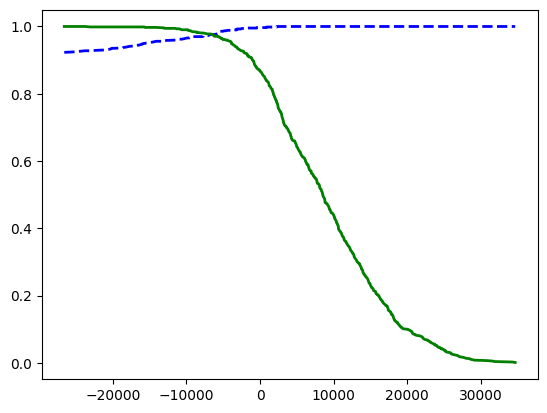

In [149]:

from sklearn.metrics import precision_recall_curve
y_scores = sgd.decision_function(x_test)
# y_scores = cross_val_predict(sgd, x_train, y_train, cv=3, method="decision_function")

precisions, recalls, threshold = precision_recall_curve(y_np, y_scores)
plt.plot(threshold, precisions[:-1],'b--' , label="Precision", linewidth=2)
plt.plot(threshold, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.show()



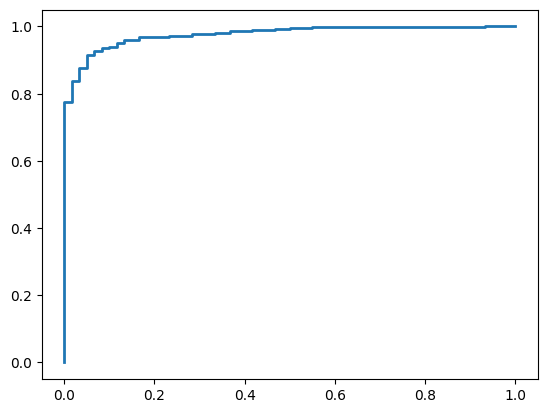

In [152]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_np, y_scores)
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
